In [24]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import matplotlib.pyplot as plt


In [25]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

In [26]:

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Encode the target labels
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)


In [27]:

# Build a simple neural network model
model = Sequential()
model.add(Dense(8, input_dim=4, activation='relu'))
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Lists to store training and validation accuracy
train_accuracy = []
val_accuracy = []

# Train the model and collect accuracy information
for epoch in range(50):
    history = model.fit(X_train, y_train, epochs=1, batch_size=8, validation_data=(X_test, y_test))
    train_accuracy.append(history.history['accuracy'][0])
    val_accuracy.append(history.history['val_accuracy'][0])


15/15 [==============================] - 0s 9ms/step - loss: 0.3455 - accuracy: 0.8667 - val_loss: 0.2867 - val_accuracy: 0.9000


In [28]:

# Evaluate the model on the test set
predictions = np.argmax(model.predict(X_test), axis=-1)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy on the test set: {accuracy * 100:.2f}%")

1/1 [==============================] - 0s 62ms/step
Accuracy on the test set: 90.00%


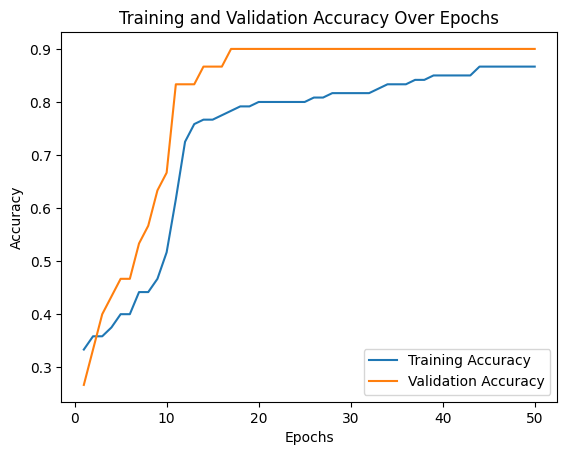

In [29]:

# Plot the accuracy graph
plt.plot(range(1, 51), train_accuracy, label='Training Accuracy')
plt.plot(range(1, 51), val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
